In [3]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def func(x, a0, a1, a2, a3, a4):
    func = np.polynomial.chebyshev.chebval(x, [a0, a1, a2, a3, a4])
    return func

In [5]:
def crit(params, *args):
    a0, a1, a2, a3, a4 = params
    data_moments, ages = args
    model_moments = func(ages, a0, a1, a2, a3, a4)

    distance = ((data_moments - model_moments) ** 2).sum()
    return distance

In [6]:
a0 = 2
a1 = 2
a2 = -2.53935826e-02
a3 = -3.22337423e-02
a4 = 1.92251739e-04
a5 = -2.57687994e-09
a6 = 2
params_init = np.array([a0, a1, a2, a3, a4])
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, 23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, 21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, 20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, 20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, 19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, 19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, 21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, 22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, 29.65075992, 30.46944758, 31.51634777, 33.13353793, 32.89186997, 38.07083882, 39.2992811, 40.07987878, 35.19951571, 35.97943562, 37.05601334, 37.42979341, 37.91576867, 38.62775142, 39.4885405, 37.10609921, 40.03988031, 40.86564363, 41.73645892, 42.6208256, 43.37786072, 45.38166073, 46.22395387, 50.21419653, 51.05246704, 53.86896121, 53.90029708, 61.83586775, 64.87563699, 66.91207845, 68.07449767, 71.27919965, 73.57195873, 74.95045988, 76.6230815])
S = 80
ages = np.linspace(20, 100, S)

est_output = opt.minimize(crit, params_init,\
                            args=(data_moments, ages),\
                            method="L-BFGS-B", tol=1e-50,\
                            options={'eps': 1e-15, 'maxiter': 1e20})
a0_GMM, a1_GMM, a2_GMM, a3_GMM, a4_GMM = est_output.x
est_output

      fun: 1020.8473117301637
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([   0.        ,  227.37367544,    0.        , 3979.03932026,
       2387.42359215])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 756
      nit: 60
   status: 0
  success: True
        x: array([ 2.00000090e+00,  1.99980140e+00, -3.22305081e-02,  1.92216853e-04,
       -3.14374042e-07])

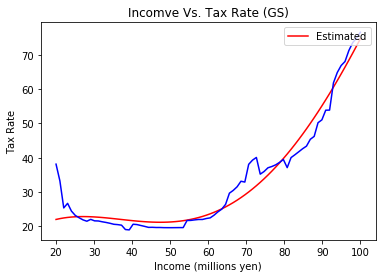

In [7]:
data = func(ages, a0_GMM, a1_GMM, a2_GMM, a3_GMM, a4_GMM)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

In [9]:
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, 23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, 21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, 20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, 20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, 19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, 19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, 21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, 22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, 29.65075992, 30.46944758, 31.51634777, 33.13353793, 32.89186997, 38.07083882, 39.2992811, 40.07987878, 35.19951571, 35.97943562, 37.05601334, 37.42979341, 37.91576867, 38.62775142, 39.4885405, 37.10609921, 40.03988031, 40.86564363, 41.73645892, 42.6208256, 43.37786072, 45.38166073, 46.22395387, 50.21419653, 51.05246704, 53.86896121, 53.90029708, 61.83586775, 64.87563699, 66.91207845, 68.07449767, 71.27919965, 73.57195873, 74.95045988, 76.6230815])
np.polynomial.chebyshev.chebfit(ages, data_moments, 4)

array([ 1.14432355e+02, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04,
        1.01718461e-06])

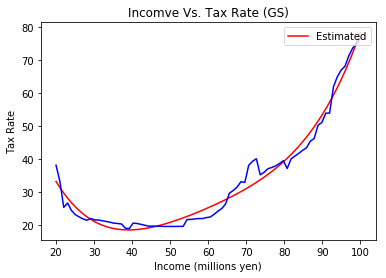

In [10]:
data = func(ages, 1.14432355e+02, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04,
        1.01718461e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

In [180]:
ages

array([ 20.        ,  21.01265823,  22.02531646,  23.03797468,
        24.05063291,  25.06329114,  26.07594937,  27.08860759,
        28.10126582,  29.11392405,  30.12658228,  31.13924051,
        32.15189873,  33.16455696,  34.17721519,  35.18987342,
        36.20253165,  37.21518987,  38.2278481 ,  39.24050633,
        40.25316456,  41.26582278,  42.27848101,  43.29113924,
        44.30379747,  45.3164557 ,  46.32911392,  47.34177215,
        48.35443038,  49.36708861,  50.37974684,  51.39240506,
        52.40506329,  53.41772152,  54.43037975,  55.44303797,
        56.4556962 ,  57.46835443,  58.48101266,  59.49367089,
        60.50632911,  61.51898734,  62.53164557,  63.5443038 ,
        64.55696203,  65.56962025,  66.58227848,  67.59493671,
        68.60759494,  69.62025316,  70.63291139,  71.64556962,
        72.65822785,  73.67088608,  74.6835443 ,  75.69620253,
        76.70886076,  77.72151899,  78.73417722,  79.74683544,
        80.75949367,  81.7721519 ,  82.78481013,  83.79

### Experiments

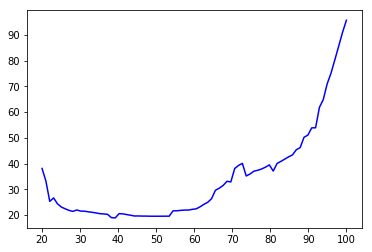

In [179]:
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, \
                         23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, \
                         21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, \
                         20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, \
                         20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, \
                         19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, \
                         19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, \
                         21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, \
                         22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, \
                         29.65075992, 30.46944758, 31.51634777, 33.13353793, 32.89186997, \
                         38.07083882, 39.2992811, 40.07987878, 35.19951571, 35.97943562, \
                         37.05601334, 37.42979341, 37.91576867, 38.62775142, 39.4885405, \
                         37.10609921, 40.03988031, 40.86564363, 41.73645892, 42.6208256, \
                         43.37786072, 45.38166073, 46.22395387, 50.21419653, 51.05246704, \
                         53.86896121, 53.90029708, 61.83586775, 64.87563699, 70.91207845, \
                         75.07449767, 80.27919965, 85.57195873, 90.95045988, 95.6230815])

# last 35 skyro
plt.plot(ages, data_moments, color = 'b', label = r'Data')

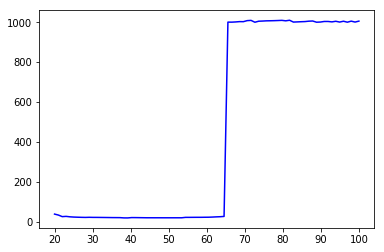

In [200]:
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, \
                         23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, \
                         21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, \
                         20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, \
                         20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, \
                         19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, \
                         19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, \
                         21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, \
                         22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, \
                         1000.65075992, 1000.46944758, 1001.51634777, 1003.13353793, 1002.89186997, \
                         1008.07083882, 1009.2992811, 1000.07987878, 1005.19951571, 1005.97943562, \
                         1007.05601334, 1007.42979341, 1007.91576867, 1008.62775142, 1009.4885405, \
                         1007.10609921, 1010.03988031, 1000.86564363, 1001.73645892, 1002.6208256, \
                         1003.37786072, 1005.38166073, 1006.22395387, 1000.21419653, 1001.05246704, \
                         1003.86896121, 1003.90029708, 1001.83586775, 1004.87563699, 1000.91207845, \
                         1005.07449767, 1000.27919965, 1005.57195873, 1000.95045988, 1005.6230815])

# last 35 skyro
plt.plot(ages, data_moments, color = 'b', label = r'Data')

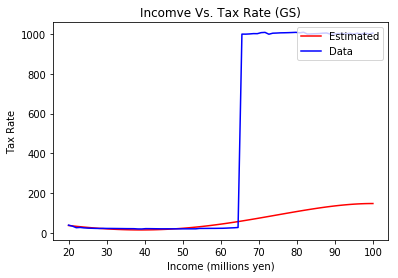

In [201]:
data = func(ages, 8.54802069e+01, -2.19154735e+00, -2.22817460e-02,  4.49993507e-04,
       -1.34197054e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')
plt.legend(loc='upper right')

In [202]:
numpy.polynomial.chebyshev.chebfit(ages, data_moments, 4)

array([-4.24292682e+02,  7.43693596e+01, -1.77576394e+00,  1.52068217e-02,
       -3.94351598e-05])

In [92]:
def func(x, *args):
    func = np.polynomial.chebyshev.chebval(x, [*args])
    return func

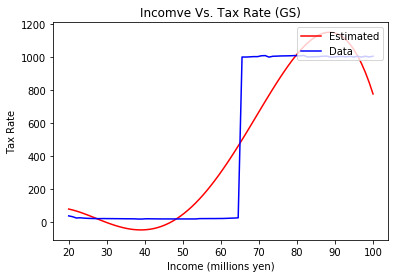

In [204]:
data = func(ages, -4.24292682e+02,  7.43693596e+01, -1.77576394e+00,  1.52068217e-02,
       -3.94351598e-05)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')
plt.legend(loc='upper right')

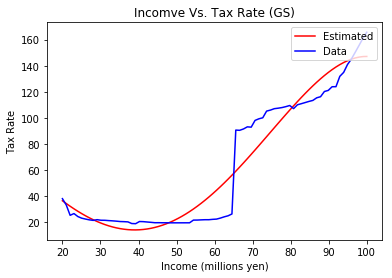

In [196]:
data = func(ages, 8.54802069e+01, -2.19154735e+00, -2.22817460e-02,  4.49993507e-04,
       -1.34197054e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')
plt.legend(loc='upper right')

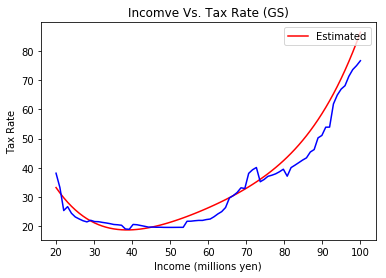

In [171]:
data = func(ages, 1.14432355e+02, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04, 1.02718461e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

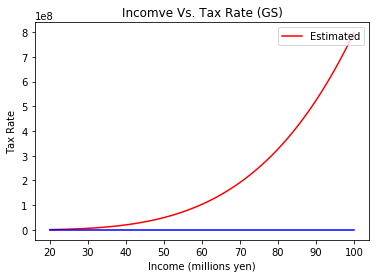

In [106]:
data = func(ages, 1.14432355e+02, -6.86389235e+00,  8.77593062e-02,  8.42993333e-03,
  9.99961326e-01)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

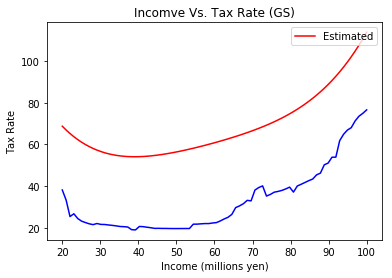

In [140]:
data = func(ages, 150, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04,
  1.01718461e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

#### 

### Graphing Labor Data

In [112]:
labor_hours = np.array([167, 165, 165, 165, 165, 166, 165, 165, 164, 166, 164])

labor_part_rate = np.array([0.69, 0.849, 0.849, 0.847, 0.847, 0.859, 0.859, 0.709, 0.709, 0.212, 0.212])

employ_rate = np.array([0.937, 0.954, 0.954, 0.966, 0.966, 0.97, 0.97, 0.968, 0.968, 0.978, 0.978])

labor_hours_adj = labor_hours * labor_part_rate * employ_rate

    # get fraction of time endowment worked (assume time
    # endowment is 24 hours minus required time to sleep 6.5 hours)
labor_moments = labor_hours_adj * 12 / (365 * 17.5)
labor_moments

array([0.20284088, 0.25106741, 0.25106741, 0.25362661, 0.25362661,
       0.25985036, 0.25828499, 0.21274329, 0.21145394, 0.06465962,
       0.06388059])

In [113]:
model_moments = np.array([0.32939923110797303, 0.3338015260217386, 0.35909105932009105, 0.37539615356388717, \
          0.38509142347626457, 0.38574642934840686, 0.3784334230218069, 0.36555275695791467, \
          0.3438113631065856, 0.3127118155207371, 0.233205594317522])

In [156]:
ages = np.linspace(20, 100, S)
age_bins = np.linspace(20, 75, 12)
age_bins[11] = 101
labels = np.linspace(20, 70, 11)
labels[-1] = 85
labels

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 85.])

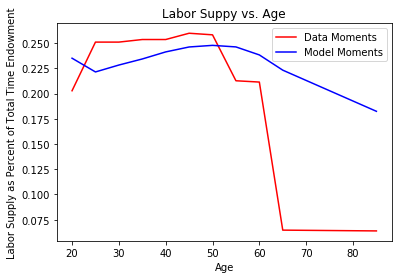

In [157]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')

In [162]:
model_moments = np.array([0.26280782645624473, 0.25125837817800445, 0.2609652904470937, 0.2686426215499922, 0.27647864956390755, 0.2812128890057656, 0.28178725148539163, 0.27858625382792546, 0.2681284198046509, 0.24964896148437535, 0.19968287319667855])

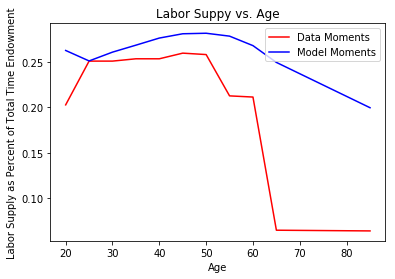

In [163]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# with a0 = 150 

In [164]:
model_moments = np.array([0.2351009313419544, 0.22148634543117984, 0.22832760219801457, 0.2343418291969964, 0.24134617398563593, 0.24623442628143122, 0.24783390571384742, 0.24629264987773436, 0.23835484785650748, 0.22325467910767705, 0.18245643396777275])

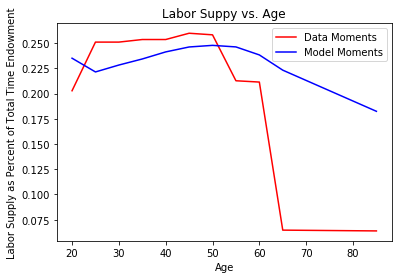

In [165]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# with a0 = 180 
# DATA and MODEL DISTANCE:  0.04431202325065711

In [166]:
model_moments = np.array([0.24293766885599888, 0.22972622867533077, 0.23726101355506668, 0.2436888160280434, 0.2509287554268687, 0.25581759400738513, 0.2571973955675017, 0.2552678022128002, 0.24669926637042539, 0.23072097959614446, 0.18749598790394173])

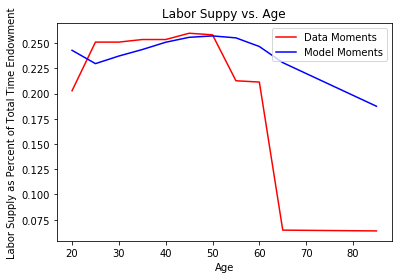

In [167]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# with a0 = 170
# DATA and MODEL DISTANCE:  0.04828500988040618

In [176]:
model_moments = np.array([0.2852445232727669, 0.28102975026653915, 0.29542085849216393, 0.30410258248170685, 0.31066573495035904, 0.31303040789487074, 0.3112155697881269, 0.30624691517100866, 0.294285612584833, 0.2739947492461137, 0.21435808264734424])

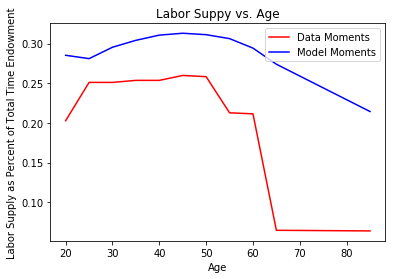

In [177]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
#0.1031550687611485

In [185]:
model_moments = np.array([0.2256835174832246, 0.21279864035215443, 0.22049193076146942, 0.22736515123018702, 0.2338898037650013, 0.2363744016795749, 0.23348292733397832, 0.22584993657640956, 0.21164041418319948, 0.1915072634137047, 0.1477425308637833])

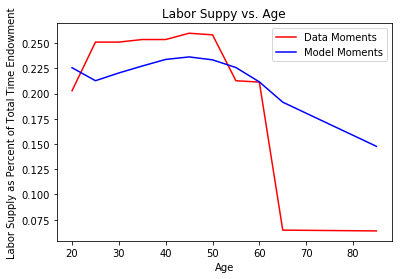

In [186]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# DATA and MODEL DISTANCE:  0.028461583040964546

In [193]:
model_moments = np.array([0.2259028129867931, 0.21295422296198854, 0.22059442365687051, 0.22740392749112828, 0.23383671063046393, 0.2362033936361526, 0.23317386766416834, 0.2253931205453907, 0.21104539204176087, 0.19079652009071224, 0.1467245679348507])

In [194]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1

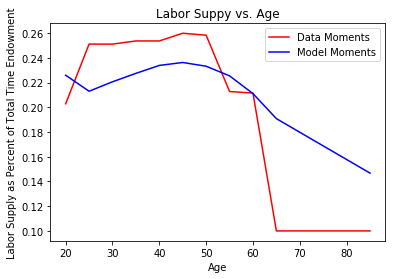

In [195]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')